## Scraping Data Science skills from Indeed


Pooja Umathe

In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen

In [2]:
# get the count of each language of Los Angeles
url = "https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles%2C+CA"
sum_py = 0
sum_C = 0
sum_Cplus = 0
sum_java = 0
sum_javascript = 0
sum_r = 0
sum_sql = 0
sum_hadoop = 0
sum_hive = 0
sum_pig = 0
sum_spark = 0
sum_aws = 0 
sum_tableau = 0
postings = 0

i=0

for i in range(10):   
    page = urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for i in all_matches:
        jd_url = 'http://www.indeed.com/m/'+i['href']
        response = requests.get(jd_url)
        jd_page = response.text
        jd_soup = BeautifulSoup(jd_page, 'lxml')
        jd_desc = jd_soup.findAll('div',attrs={'id':['desc']}) ## find the structure like: <div id="desc"></>
        postings = postings + 1
        
        C = re.findall(r'[\b\s\/]C\b[\/\s,]', str(jd_desc))
        sum_C = sum_C + len(C)
        
        c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(jd_desc))
        sum_Cplus = sum_Cplus + len(c_plus)
        
        java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(jd_desc))
        sum_java = sum_java + len(java)
        
        javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(jd_desc))
        sum_javascript = sum_javascript + len(javascript)
        
        python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(jd_desc))
        sum_py = sum_py + len(python)
        
        R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(jd_desc))
        sum_r = sum_r + len(R)
        
        sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
        sum_sql = sum_sql + len(sql)
        
        hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(jd_desc))
        sum_hadoop = sum_hadoop + len(hadoop)
        
        hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(jd_desc))
        sum_hive = sum_hive + len(hive)
        
        pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(jd_desc))
        sum_pig = sum_pig + len(pig)
        
        spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(jd_desc))
        sum_spark = sum_spark + len(spark)
        
        aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(jd_desc))
        sum_aws = sum_aws + len(aws)
        
        tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
        sum_tableau = sum_tableau + len(tableau)
        
    url_all = soup.findAll(attrs={'rel':['next']})
    print(url_all)
    
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    
print("C:", sum_C)

print("C++:", sum_Cplus)

print("Java:", sum_java)

print("Javascript:", sum_javascript)

print("Python:", sum_py)

print("R:", sum_r)

print("SQL:", sum_sql)

print("Hadoop:", sum_hadoop)

print("Hive:", sum_hive)

print("Pig:", sum_pig)

print("Spark:", sum_spark)

print("AWS:", sum_aws)

print("Tableau:", sum_tableau)

[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;fromTravel=1&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+scientist&amp;l=Los+Angeles%2C+CA&amp;f

In [3]:
# make it into a function
def getlink(url):
    sum_py = 0
    sum_C = 0
    sum_Cplus = 0
    sum_java = 0
    sum_javascript = 0
    sum_r = 0
    sum_sql = 0
    sum_hadoop = 0
    sum_hive = 0
    sum_pig = 0
    sum_spark = 0
    sum_aws = 0 
    sum_tableau = 0

    i=0

    for i in range(10):   
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for i in all_matches:
            jd_url = 'http://www.indeed.com/m/'+i['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']}) ## find the structure like: <div id="desc"></>
            

            C = re.findall(r'[\b\s\/]C\b[\/\s,]', str(jd_desc))
            sum_C = sum_C + len(C)

            c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(jd_desc))
            sum_Cplus = sum_Cplus + len(c_plus)

            java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(jd_desc))
            sum_java = sum_java + len(java)

            javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(jd_desc))
            sum_javascript = sum_javascript + len(javascript)

            python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(jd_desc))
            sum_py = sum_py + len(python)

            R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(jd_desc))
            sum_r = sum_r + len(R)

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sum_sql = sum_sql + len(sql)

            hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(jd_desc))
            sum_hadoop = sum_hadoop + len(hadoop)

            hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(jd_desc))
            sum_hive = sum_hive + len(hive)

            pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(jd_desc))
            sum_pig = sum_pig + len(pig)

            spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(jd_desc))
            sum_spark = sum_spark + len(spark)

            aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(jd_desc))
            sum_aws = sum_aws + len(aws)

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            sum_tableau = sum_tableau + len(tableau)

        url_all = soup.findAll(attrs={'rel':['next']})
        #print(url_all)
        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    
    # make it into a dataframe
    df=pd.DataFrame({'language':["C","C++","Java","Javascript","Python","R","SQL","Hadoop","Hive","Pig",
                    "Spark","AWS","Tableau"],'count':[sum_C,sum_Cplus,sum_java,sum_javascript,sum_py,sum_r,sum_sql,sum_hadoop,sum_hive,
                 sum_pig,sum_spark,sum_aws,sum_tableau]})
    
    return df

In [4]:
# Los Angeles
df_losangeles=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles%2C+CA')
df_losangeles

,language,count
0,C,5
1,C++,18
2,Java,22
3,Javascript,6
4,Python,103
5,R,113
6,SQL,126
7,Hadoop,20
8,Hive,5
9,Pig,1


In [5]:
# San Francisco
df_sanfrancisco=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=san+Francisco')
df_sanfrancisco

,language,count
0,C,4
1,C++,10
2,Java,12
3,Javascript,2
4,Python,99
5,R,81
6,SQL,79
7,Hadoop,22
8,Hive,35
9,Pig,3


In [6]:
# new york
df_newyork=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=new+york')
df_newyork

,language,count
0,C,4
1,C++,7
2,Java,21
3,Javascript,9
4,Python,93
5,R,79
6,SQL,82
7,Hadoop,19
8,Hive,13
9,Pig,2


In [7]:
# boston
df_boston=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=boston')
df_boston

,language,count
0,C,33
1,C++,16
2,Java,29
3,Javascript,5
4,Python,93
5,R,86
6,SQL,60
7,Hadoop,12
8,Hive,6
9,Pig,3


In [8]:
# Chicago
df_chicago=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=chicago')
df_chicago

,language,count
0,C,6
1,C++,9
2,Java,18
3,Javascript,1
4,Python,116
5,R,83
6,SQL,108
7,Hadoop,28
8,Hive,11
9,Pig,1


In [9]:

# DC
df_dc=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=dc')
df_dc


,language,count
0,C,6
1,C++,13
2,Java,39
3,Javascript,5
4,Python,116
5,R,78
6,SQL,81
7,Hadoop,24
8,Hive,13
9,Pig,1


In [10]:
# Austin
df_austin=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=austin')
df_austin

,language,count
0,C,10
1,C++,23
2,Java,49
3,Javascript,4
4,Python,124
5,R,79
6,SQL,97
7,Hadoop,33
8,Hive,23
9,Pig,4


In [11]:
# Orange County
df_orange_county=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=orange+county')
df_orange_county


,language,count
0,C,7
1,C++,14
2,Java,41
3,Javascript,7
4,Python,120
5,R,98
6,SQL,75
7,Hadoop,20
8,Hive,3
9,Pig,0


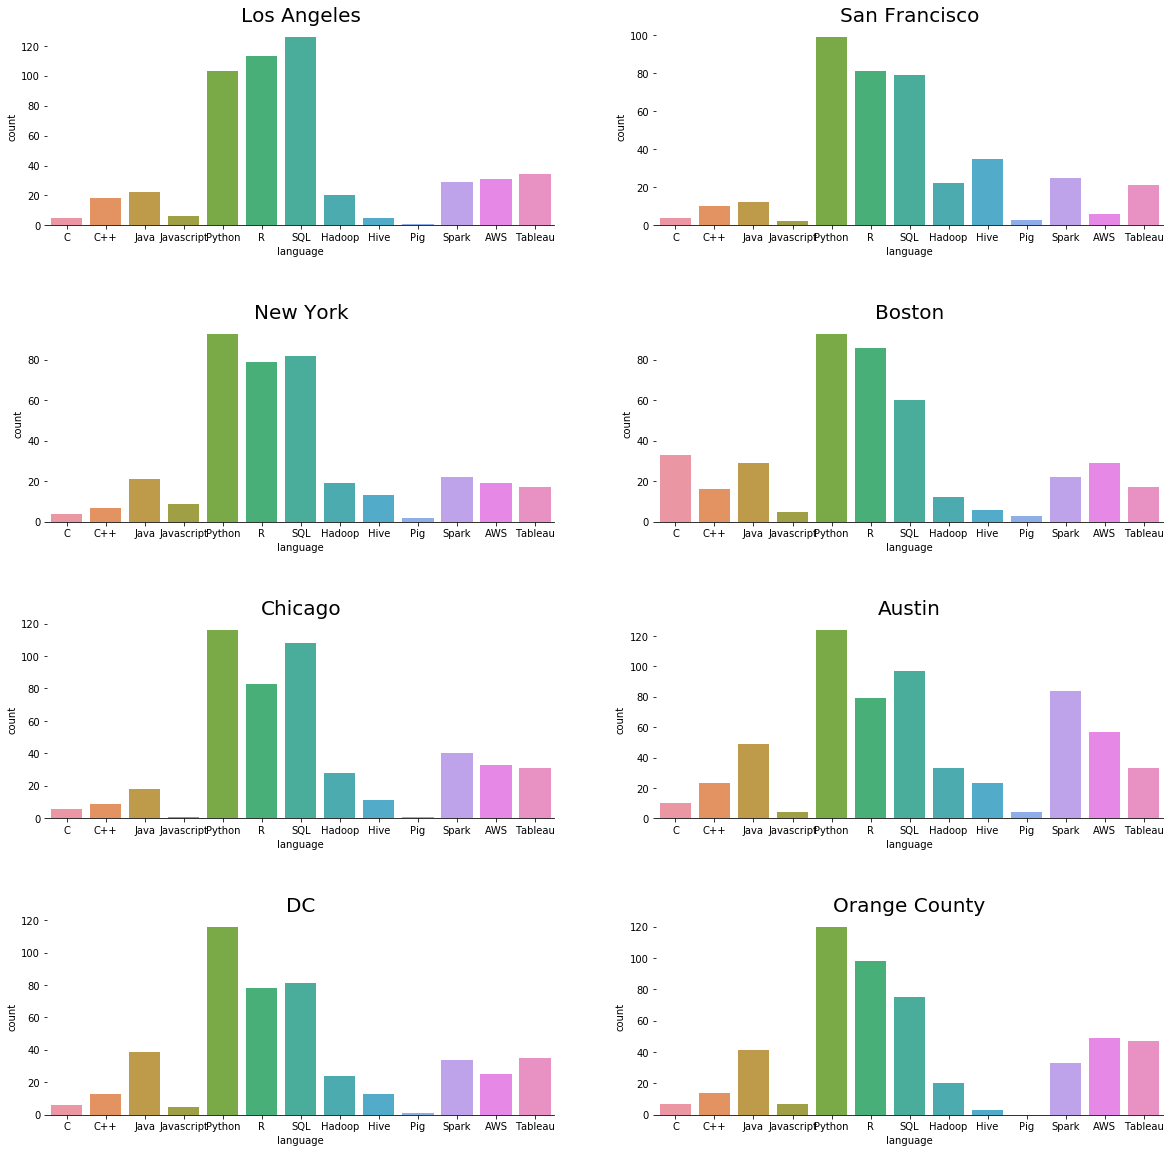

In [14]:
# plot all the dataframe
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(4, 2, figsize=(20, 20))
sns.despine(left=True)


sns.barplot(x='language', y='count', data=df_losangeles,ax=axes[0, 0]).set_title('Los Angeles',fontsize=20)
sns.barplot(x='language', y='count', data=df_sanfrancisco,ax=axes[0, 1]).set_title('San Francisco',fontsize=20)
sns.barplot(x='language', y='count', data=df_newyork,ax=axes[1, 0]).set_title('New York',fontsize=20)
sns.barplot(x='language', y='count', data=df_boston,ax=axes[1, 1]).set_title('Boston',fontsize=20)
sns.barplot(x='language', y='count', data=df_chicago,ax=axes[2, 0]).set_title('Chicago',fontsize=20)
sns.barplot(x='language', y='count', data=df_austin,ax=axes[2, 1]).set_title('Austin',fontsize=20)
sns.barplot(x='language', y='count', data=df_dc,ax=axes[3, 0]).set_title('DC',fontsize=20)
sns.barplot(x='language', y='count', data=df_orange_county,ax=axes[3, 1]).set_title('Orange County',fontsize=20)

# adjust the space
plt.subplots_adjust(hspace = 0.5)

In [13]:
df_newyork.to_csv("newyork.csv")